## Курсовой проект

### Задача:
##### Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.
### Наименование файлов с данными
##### course_project_train.csv - обучающий датасет
##### course_project_test.csv - тестовый датасет
### Описание датасета
* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

### Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pylab import rcParams
import seaborn as sns



%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Функции

In [2]:
def hists_descr(feature, bins = 60, log_x = False, log_y = False, grid = False):
    matplotlib.rcParams.update({'font.size' : 8})
    sns.set(rc={"figure.figsize": (12, 4)})
    plt.figure(figsize=(24,6))
    plt.subplot(121)
    feature.hist(bins=bins)
    plt.ylabel('Кол-во наблюдений')
    if log_x:
        plt.xscale(value = 'log')
    if log_y:
        plt.yscale(value = 'log')
    
    plt.subplot(122)
    ax1 = sns.distplot(feature)
    if log_x:
        ax1.set_xscale('log')
    if log_y:
        ax1.set_yscale('log')
    plt.show()
    

def box(num_feature,cat_feature, log_x = False, log_y = False):
    matplotlib.rcParams.update({'font.size' : 8})
    sns.set(rc={"figure.figsize": (10, 12)})
    target = train_df['Credit Default']
    temp = train_df[f'{cat_feature}'].astype('category')
    sns.boxplot(x = f'{num_feature}', y = temp, hue = target, data = train_df, orient = 'h', palette = 'Set1')

### Преобразование датасетов

In [3]:
train_df = pd.read_csv('course_project_train.csv')
train_df['Id'] = train_df.index.tolist()

## Анализ данных

In [4]:
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,2
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,3
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,4


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [6]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733,3749.500000
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874,2165.207842
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000,1874.750000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000,3749.500000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000,5624.250000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,7499.000000


#### Credit Default

In [8]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Видим, что кол-во выполнения кредитных обязательств значительно превышает кол-во невыполнения

## Количественные данные

### Annual Income

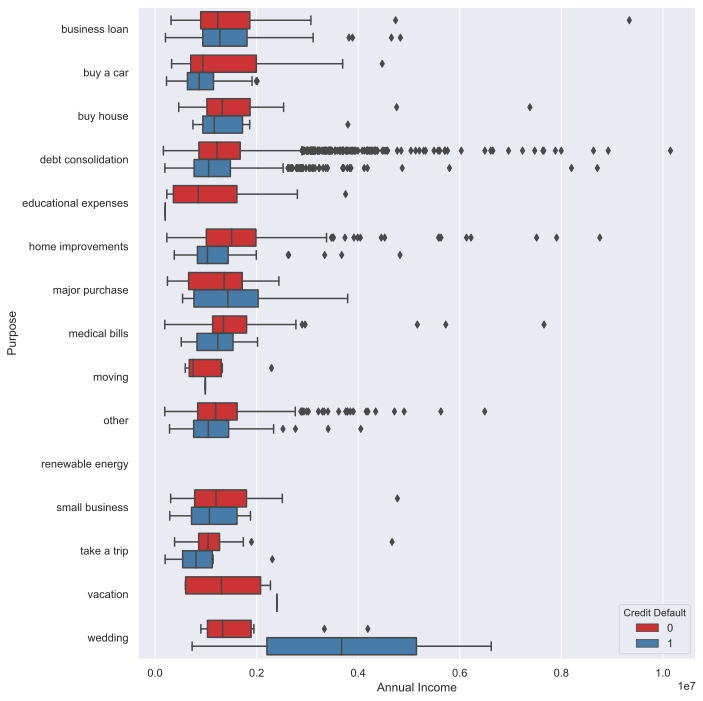

In [9]:
box('Annual Income','Purpose')

Интересная ситуация со свадьбами. С увеличением годового дохода растут просрочки. Забавно)

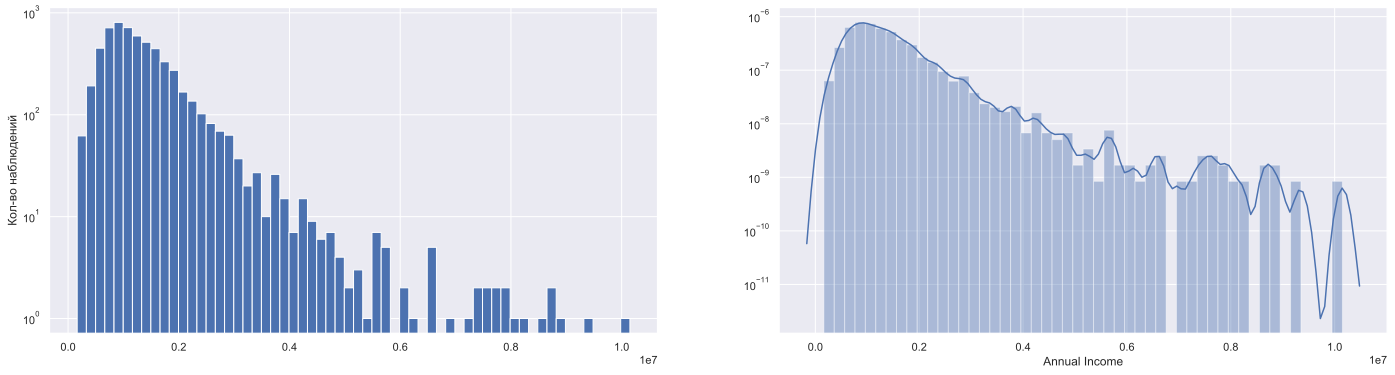

In [10]:
hists_descr(train_df['Annual Income'],log_y = True)

Видим, что объектам с доходом больше 8000000 у.е. понадобилось кредитование,это вполне нормально, но посмотрим на цель кредита.

In [11]:
train_df[train_df['Annual Income'] > 8000000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
1025,Rent,8923844.0,3 years,0.0,15.0,17.2,1452000.0,0.0,NaN,0.0,debt consolidation,Short Term,670428.0,1084710.0,62095.0,723.0,0,1025
1984,Home Mortgage,8758449.0,10+ years,0.0,10.0,20.6,0.0,0.0,NaN,0.0,home improvements,Short Term,99999999.0,2759503.0,12919.0,748.0,0,1984
2200,Rent,9338880.0,10+ years,0.0,7.0,7.3,1092608.0,0.0,NaN,0.0,business loan,Short Term,788480.0,326496.0,40546.0,720.0,0,2200
2474,Home Mortgage,8633790.0,2 years,0.0,13.0,15.6,1091200.0,0.0,36.0,0.0,debt consolidation,Long Term,777546.0,765244.0,25038.0,679.0,0,2474
4491,Home Mortgage,8200229.0,2 years,0.0,11.0,16.7,333630.0,0.0,29.0,0.0,debt consolidation,Short Term,117040.0,116128.0,8610.0,7440.0,1,4491
5396,Home Mortgage,8710740.0,2 years,2.0,15.0,16.5,3162896.0,2.0,NaN,0.0,debt consolidation,Short Term,560340.0,1663545.0,40215.0,735.0,1,5396
6472,Rent,10149344.0,5 years,0.0,10.0,17.5,270380.0,0.0,22.0,0.0,debt consolidation,Short Term,664818.0,205713.0,61235.0,692.0,0,6472


##### Аномалии:
* Объект 1984 взял кредит(имея ипотеку, или на ипотеку) на 99999999 у.е. с ежемесячным платежом 12919 у.е. - выброс.
* Объект 6472 с доходом 10149344 у.е. имеет максимально открытый кредит в 270380 у.е. - выброс.
###### Эти выбросы я удалю, а вот к объекту 4491 вернемся при анализе Credit Score(7440)

In [12]:
train_df = train_df.drop([1984, 6472], axis = 0)

###### Ищем пропущенные значения

In [13]:
train_df['Annual Income'].isnull().value_counts()

False    5941
True     1557
Name: Annual Income, dtype: int64

Очень много пропусков для такой маленькой выборки,даже при замене это сильно влияет на модель.Считаю оптимальным заменить пропуски медиальным значение дохода по каждой цели кредита

In [14]:
train_df['Purpose'].value_counts()

debt consolidation      5943
other                    665
home improvements        411
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Замена пропусков медиальным значением по цели кредита

In [15]:
purposes = train_df['Purpose'].value_counts().index.to_list()
for i in purposes:
    temp = train_df.loc[train_df['Purpose'] == i, 'Annual Income']
    train_df.loc[train_df['Annual Income'].isnull() & (train_df['Purpose'] == i), 'Annual Income'] = temp.median()
    if np.isnan(temp.median()):
        train_df.loc[train_df['Annual Income'].isnull(), 'Annual Income'] = train_df['Annual Income'].median()

In [16]:
train_df[train_df['Annual Income'].isnull()]
# Все пропуски Annual Income заполнены

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id


### Tax Liens

In [17]:
train_df['Tax Liens'].isnull().value_counts() # пропусков нет
train_df['Tax Liens'].value_counts()

0.0    7364
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

### Number of Open Accounts

In [18]:
train_df['Number of Open Accounts'].isnull().value_counts() # пропусков нет
train_df['Number of Open Accounts'].value_counts()

9.0     728
11.0    692
10.0    675
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
35.0      1
41.0      1
38.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64

### Years of Credit History

Пропусков нет, аномальных значений нет

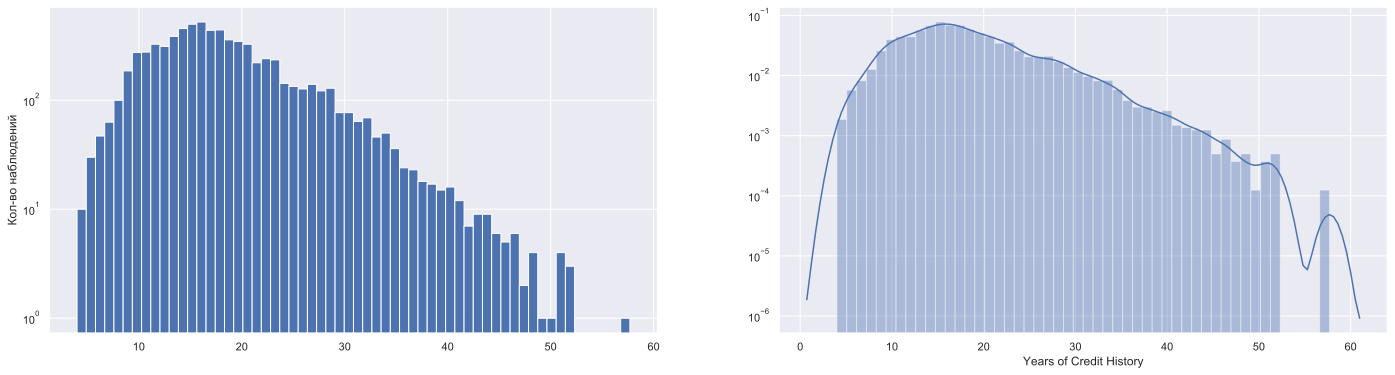

In [19]:
hists_descr(train_df['Years of Credit History'], log_y=True)

### Number of Credit Problems

In [20]:
train_df['Number of Credit Problems'].isnull().value_counts() # пропусков нет
train_df['Number of Credit Problems'].value_counts()

0.0    6467
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

### Maximum Open Credit

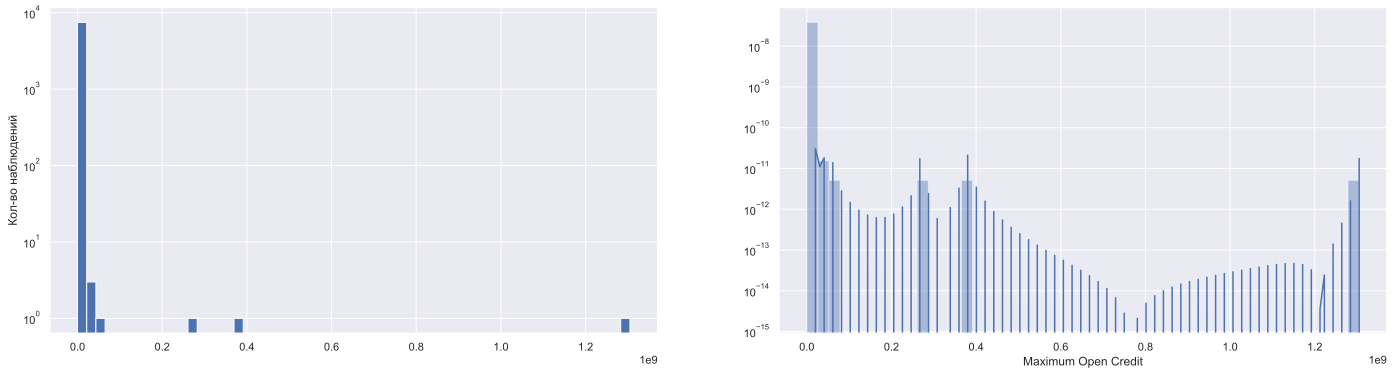

In [21]:
hists_descr(train_df['Maximum Open Credit'], log_y = True)

In [22]:
len(train_df[train_df['Maximum Open Credit'] == 0])

64

64 пропущенных значения. Попробуем подставить Current Loan Amount

In [23]:
train_df.loc[train_df['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = \
train_df.loc[train_df['Maximum Open Credit'] == 0, 'Current Loan Amount']

Также на графике видим несколько аномально высоких значений

In [24]:
#train_df[train_df['Maximum Open Credit'] > 99999990].head(4)
len(train_df[train_df['Maximum Open Credit'] > 9000000])

32

Много, вносят сильные искажения.Давайте примем эти ситуации за рефинансирование и тоже приравняем к  Current Loan Amount

In [25]:
train_df.loc[train_df['Maximum Open Credit'] > 9000000, 'Maximum Open Credit'] = \
train_df.loc[train_df['Maximum Open Credit'] > 9000000, 'Current Loan Amount']

Посмотрим на распределение

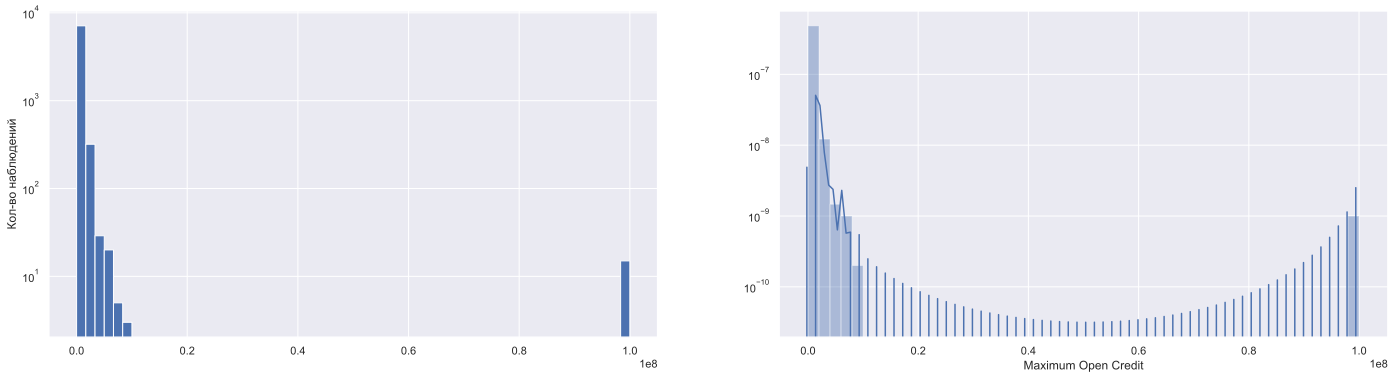

In [26]:
hists_descr(train_df['Maximum Open Credit'], log_y = True)

Снова аномалия,это выбросы в Current Loan Amount, тогда оставшиеся заменим на Current Credit Balance

In [27]:
train_df.loc[train_df['Maximum Open Credit'] > 9000000, 'Maximum Open Credit'] = \
train_df.loc[train_df['Maximum Open Credit'] > 9000000, 'Current Credit Balance']

Смотрим на распределение

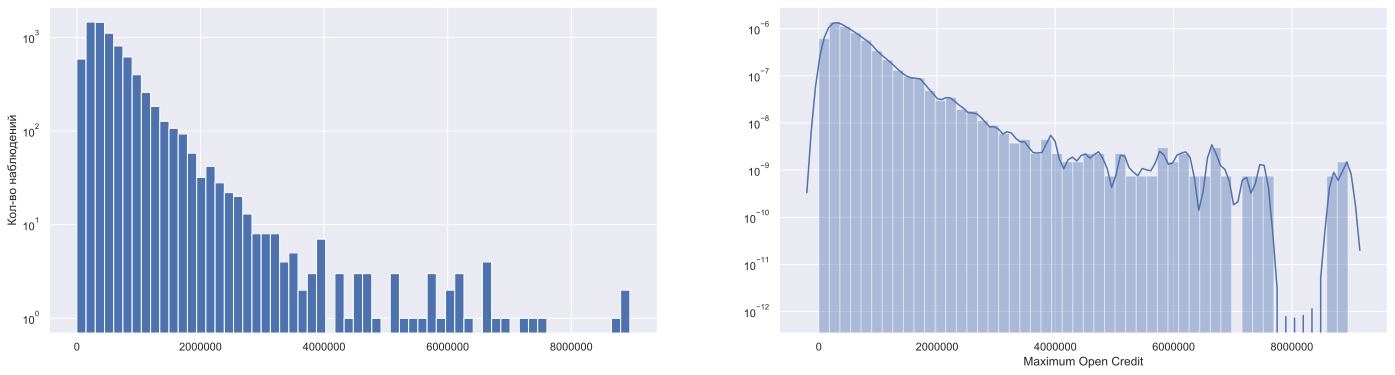

In [28]:
hists_descr(train_df['Maximum Open Credit'], log_y = True)

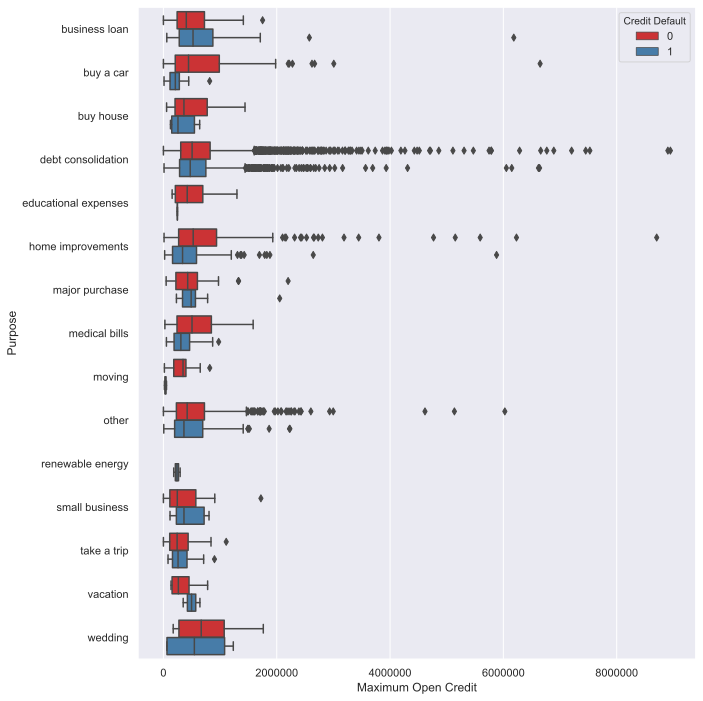

In [29]:
box('Maximum Open Credit','Purpose')

Пока будем считать, что такое распредеделение величины нас устраивает

### Months since last delinquent

In [30]:
train_df['Months since last delinquent'].isnull().value_counts()

True     4080
False    3418
Name: Months since last delinquent, dtype: int64

Я не знаю что делать с этим признаком,подчти половина значений пропущенно и он слишком привязан к ситуации конкретного объекта.У меня нет идей как искуственно заменить его. Пока решаю не использовать его при построении модели.

In [31]:
train_df.drop('Months since last delinquent', axis = 1, inplace=True)

### Bankruptcies

In [32]:
train_df['Bankruptcies'].isnull().value_counts()

False    7484
True       14
Name: Bankruptcies, dtype: int64

Можно заморочиться и заполнить пропуски в зависимости от других признаков, но их мало и я склоняюсь к замене на нулевую моду.

In [33]:
train_df['Bankruptcies'].mode()[0]

0.0

In [34]:
train_df['Bankruptcies'].fillna(0, inplace=True)

### Current Loan Amount

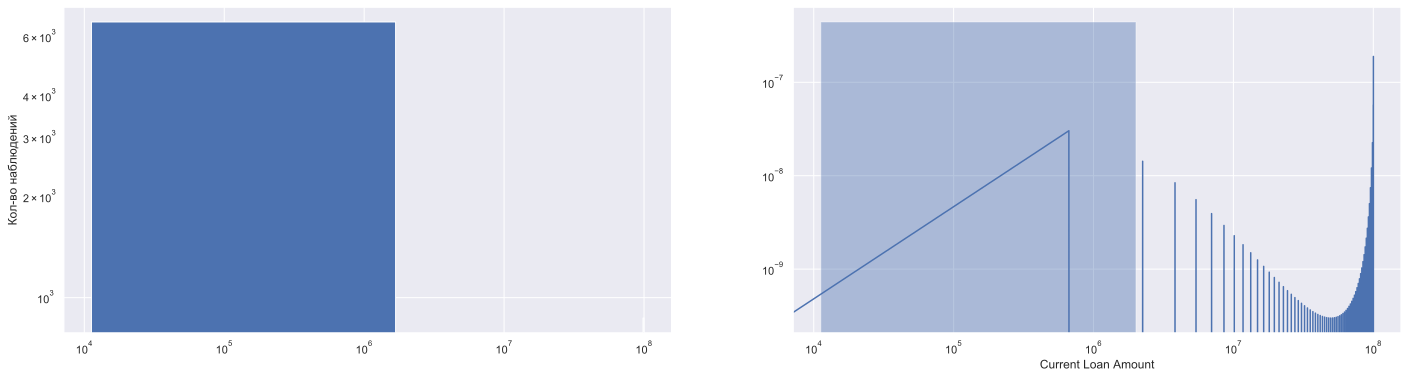

In [35]:
hists_descr(train_df['Current Loan Amount'],log_x=True, log_y=True)

In [36]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
count,7.498000e+03,7498.000000,7498.000000,7498.000000,7.498000e+03,7498.000000,7498.000000,7.498000e+03,7.498000e+03,7498.000000,5941.000000,7498.000000,7498.000000
mean,1.324667e+06,0.030141,11.131235,18.317271,6.408164e+05,0.170045,0.116965,1.186292e+07,2.895151e+05,18309.449453,1151.232621,0.281808,3749.372366
std,7.454741e+05,0.271639,4.909544,7.042829,6.362322e+05,0.498657,0.346945,3.191389e+07,3.166300e+05,11917.887145,1604.701920,0.449911,2165.172331
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000,0.000000
25%,9.307008e+05,0.000000,8.000000,13.500000,2.802030e+05,0.000000,0.000000,1.801470e+05,1.142375e+05,10066.500000,711.000000,0.000000,1874.250000
50%,1.165878e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,3.094960e+05,2.093230e+05,16076.500000,731.000000,0.000000,3749.500000
75%,1.500316e+06,0.000000,14.000000,21.800000,7.906250e+05,0.000000,0.000000,5.194750e+05,3.603112e+05,23811.500000,743.000000,1.000000,5623.750000
max,9.338880e+06,7.000000,43.000000,57.700000,8.947840e+06,7.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000,7499.000000


In [37]:
# len(train_df[train_df['Current Loan Amount'] >= 99999999])   -    869 значений, много
train_df[train_df['Current Loan Amount'] >= 99999999]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0,2
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0,6
22,Rent,463790.0,NaN,0.0,6.0,28.3,288442.0,0.0,0.0,debt consolidation,Short Term,99999999.0,157700.0,5063.0,738.0,0,22
27,Rent,1004055.0,8 years,0.0,7.0,14.5,328394.0,0.0,0.0,debt consolidation,Short Term,99999999.0,195966.0,6041.0,734.0,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7441,Rent,1406836.0,1 year,0.0,12.0,22.6,2383260.0,0.0,0.0,debt consolidation,Short Term,99999999.0,461054.0,7386.0,747.0,0,7441
7445,Home Mortgage,1564384.0,6 years,0.0,21.0,17.3,1545016.0,0.0,0.0,other,Long Term,99999999.0,1043442.0,32461.0,728.0,0,7445
7464,Home Mortgage,1159152.0,6 years,0.0,14.0,22.0,389356.0,1.0,1.0,debt consolidation,Short Term,99999999.0,49438.0,18257.0,737.0,0,7464
7475,Rent,848426.0,10+ years,0.0,8.0,20.1,526306.0,0.0,0.0,debt consolidation,Short Term,99999999.0,83638.0,16473.0,742.0,0,7475


Попробую заменить на Maximum Open Credit

In [38]:
train_df.loc[train_df['Current Loan Amount'] >=99999999, 'Current Loan Amount' ] = \
train_df.loc[train_df['Current Loan Amount'] >=99999999, 'Maximum Open Credit']

Посмотрим, что получилось

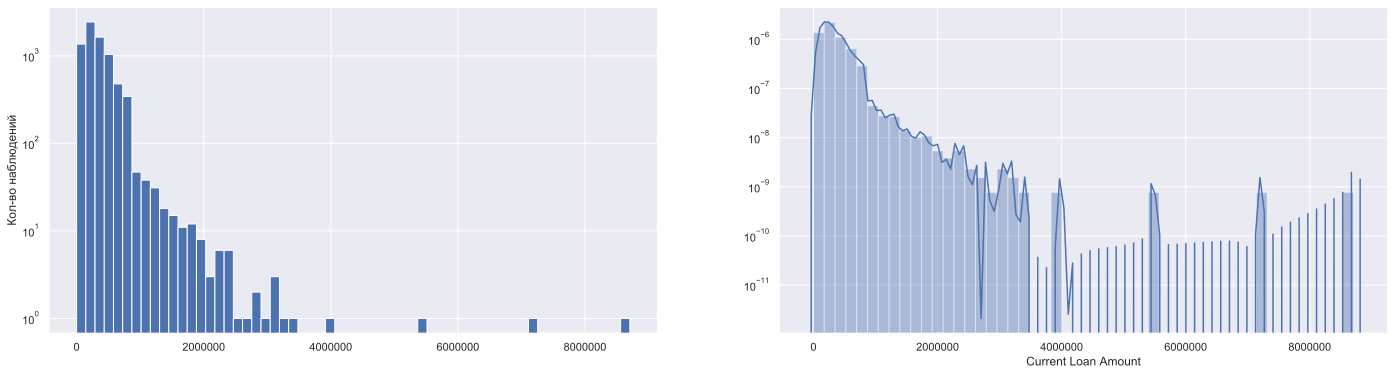

In [39]:
hists_descr(train_df['Current Loan Amount'], log_y=True)

Распределение стало похожим на Maximum Open Credit, что неудивительно, ведь я искуственно увеличил корреляцию между этими признаками путем взаимной подмены значений.В дальнейшем посмотрим на матрицу корреляций.

### Current Credit Balance

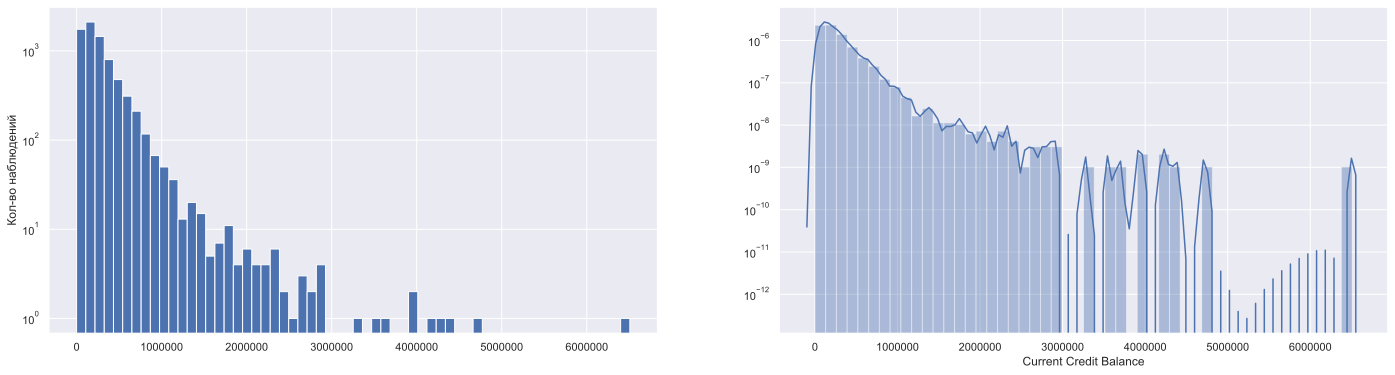

In [40]:
hists_descr(train_df['Current Credit Balance'], log_y=True)

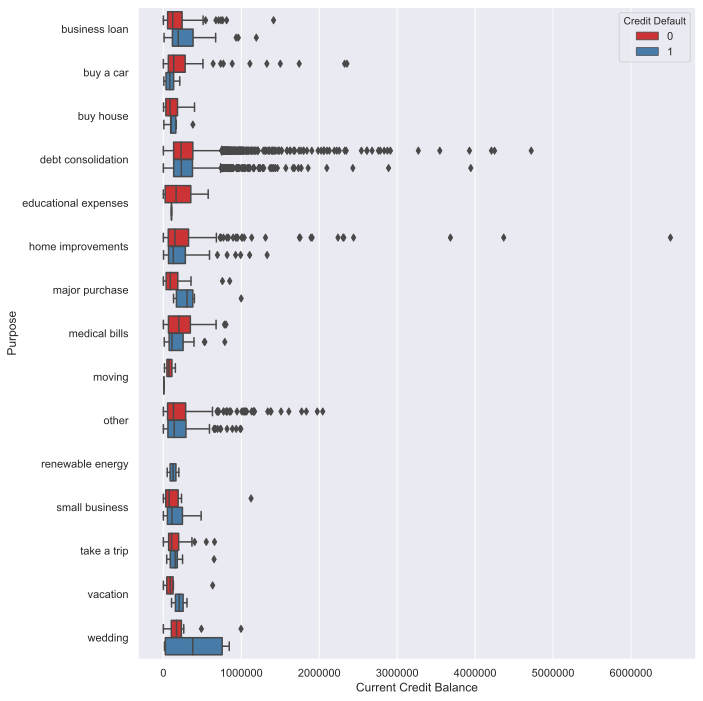

In [41]:
box('Current Credit Balance','Purpose')

Вижу значение > 6000000 с причиной "улучшение жилищных условий". Посмотрим на данный объект

In [42]:
train_df[train_df['Current Credit Balance'] > 6000000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
4769,Home Mortgage,3739960.0,9 years,0.0,7.0,22.8,757834.0,0.0,0.0,home improvements,Short Term,757834.0,6506797.0,38023.0,703.0,0,4769


Объект с годовым доходом в 3739960 у.е.,22 летней кредитной историей, 0 проблем с кредитом и при этом имея кредитный скоринг на кровне 700—720 — «плохо» берет рефинансирование ипотеки в размере 757834 у.е. с кредитным балансом 6506797 у.е.  Я возможно не правильно понимаю определение кредитного баланса, но сама ситуация выглядит странной. Удалю этот объект

In [43]:
train_df.drop(4769, axis = 0, inplace=True)

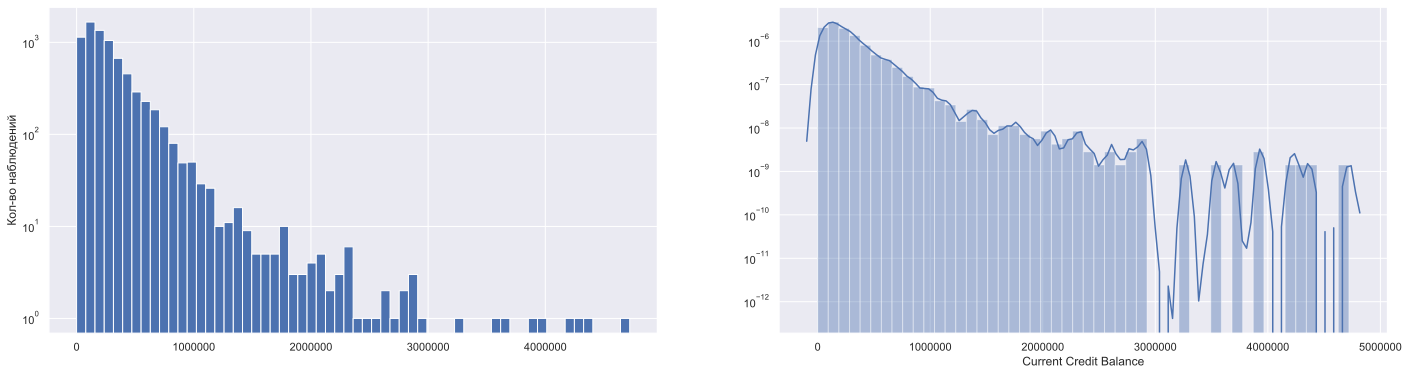

In [44]:
hists_descr(train_df['Current Credit Balance'], log_y=True)

Пока такое распредедение меня устроит, по резулятатам модели возможно прибегну к изменениям

### Monthly Debt

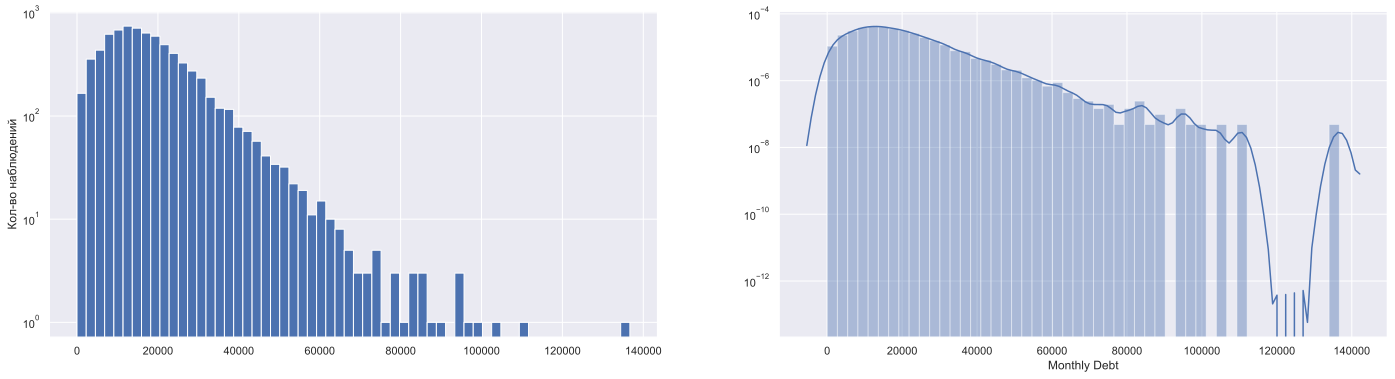

In [45]:
hists_descr(train_df['Monthly Debt'], log_y=True)

In [46]:
train_df[train_df['Monthly Debt'] > 120000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
4745,Own Home,6029954.0,4 years,0.0,30.0,17.5,753588.0,0.0,0.0,debt consolidation,Short Term,753588.0,4720132.0,136679.0,745.0,0,4745


После этой строчки начинаю сомневаться в правильности удаления объекта выше.Протестирую это при обучении, но не думаю, что что-то изменится. Пропусков и явных аномалий в Monthly Debt нет

### Credit Score

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7497 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7497 non-null   object 
 1   Annual Income              7497 non-null   float64
 2   Years in current job       7126 non-null   object 
 3   Tax Liens                  7497 non-null   float64
 4   Number of Open Accounts    7497 non-null   float64
 5   Years of Credit History    7497 non-null   float64
 6   Maximum Open Credit        7497 non-null   float64
 7   Number of Credit Problems  7497 non-null   float64
 8   Bankruptcies               7497 non-null   float64
 9   Purpose                    7497 non-null   object 
 10  Term                       7497 non-null   object 
 11  Current Loan Amount        7497 non-null   float64
 12  Current Credit Balance     7497 non-null   float64
 13  Monthly Debt               7497 non-null   float

In [48]:
train_df['Credit Score'].isnull().value_counts()

False    5940
True     1557
Name: Credit Score, dtype: int64

In [49]:
train_df[train_df['Credit Score'] > 1000]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Id
69,Home Mortgage,1408527.0,2 years,0.0,12.0,17.5,700062.0,0.0,0.0,other,Long Term,525998.0,174135.0,9320.0,6470.0,1,69
87,Home Mortgage,1533566.0,7 years,0.0,11.0,14.8,715462.0,0.0,0.0,debt consolidation,Short Term,210826.0,285475.0,18147.0,7440.0,1,87
94,Rent,1049294.0,3 years,0.0,5.0,6.1,249810.0,0.0,0.0,business loan,Short Term,337502.0,119529.0,15215.0,7010.0,1,94
96,Rent,757568.0,5 years,0.0,13.0,11.4,383548.0,0.0,0.0,debt consolidation,Short Term,210518.0,276583.0,11553.0,7320.0,1,96
116,Home Mortgage,1039984.0,NaN,0.0,10.0,23.8,147950.0,0.0,0.0,debt consolidation,Short Term,224246.0,95456.0,13780.0,7390.0,1,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7422,Rent,694868.0,1 year,0.0,4.0,7.8,143066.0,0.0,0.0,debt consolidation,Long Term,244178.0,122075.0,4268.0,6690.0,1,7422
7433,Rent,2011758.0,< 1 year,0.0,4.0,14.9,22176.0,0.0,0.0,buy a car,Long Term,106480.0,18791.0,12590.0,6060.0,1,7433
7450,Home Mortgage,1432277.0,10+ years,0.0,16.0,22.8,825176.0,0.0,0.0,debt consolidation,Short Term,187924.0,458242.0,27094.0,7290.0,1,7450
7460,Rent,769462.0,5 years,0.0,8.0,17.0,313786.0,0.0,0.0,debt consolidation,Short Term,109186.0,45524.0,4585.0,7470.0,1,7460


Допущу, что тут просто ошибка в значениях. Исправим

In [50]:
score_list = train_df['Credit Score'].to_list()
credit_list = []
for i in score_list:
    if i > 1000:
        i = i / 10
        credit_list.append(i)
    else:
        credit_list.append(i)
len(score_list), len(credit_list) 

(7497, 7497)

In [51]:
train_df.drop('Credit Score', axis = 1, inplace=True)
train_df['Credit Score'] = credit_list

Также имеются пропущенные значения. Заполним их медианой(среднее значение Credit Score для Американцев равно 723, медиана в нашем датасете равна 729)

In [52]:
train_df['Credit Score'] = train_df['Credit Score'].fillna(train_df['Credit Score'].median())

In [53]:
train_df['Credit Score'].isnull().value_counts()

False    7497
Name: Credit Score, dtype: int64

Все аномальные значения исправлены, все пропуски заполнены. Посмотрим на распределение

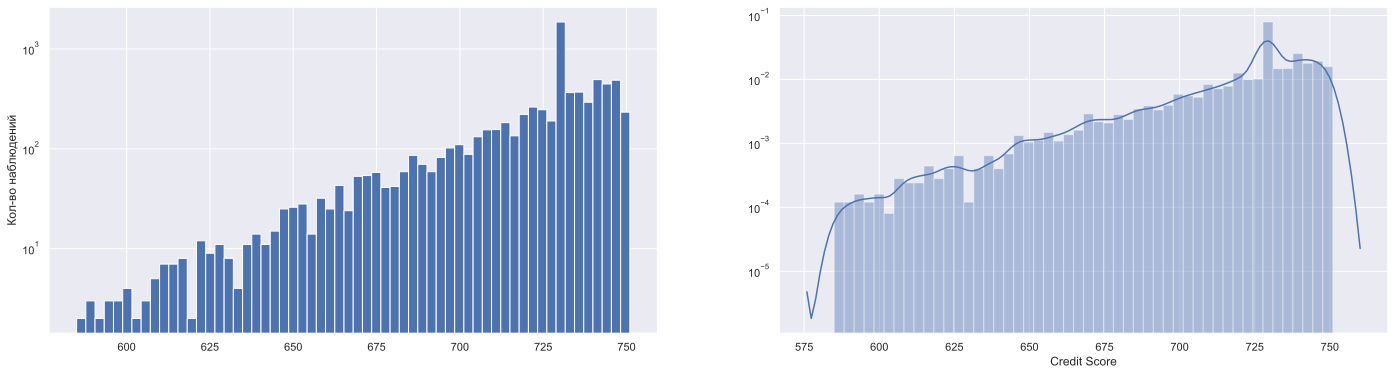

In [54]:
hists_descr(train_df['Credit Score'], log_y=True)

## Категориальные данные

### Home Owner

In [55]:
train_df['Home Ownership'].isnull().value_counts() # пропусков нет
train_df['Home Ownership'].value_counts()

Home Mortgage    3635
Rent             3203
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

### Years in current job

In [56]:
train_df['Years in current job'].isnull().value_counts()

False    7126
True      371
Name: Years in current job, dtype: int64

In [57]:
train_df['Years in current job'].mode()

0    10+ years
dtype: object

Заполним пропуски модой

In [58]:
train_df['Years in current job'].fillna('10+ years', inplace=True)

### Purpose

In [59]:
train_df['Purpose'].value_counts()

debt consolidation      5943
other                    665
home improvements        410
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Не знаю, что такое возобновляемая энергия. Может это покрытие крыши поликремниевыми батареями(к примеру), можно тогда заменить на home improvements, но замени на моду - debt consolidation.

In [60]:
train_df.loc[train_df['Purpose'] == 'renewable energy', 'Purpose'] = train_df['Purpose'].mode()

### Term

In [61]:
train_df['Term'].value_counts()

Short Term    5553
Long Term     1944
Name: Term, dtype: int64

Пропусков нет

### Посмотрим на корреляционную матрицу

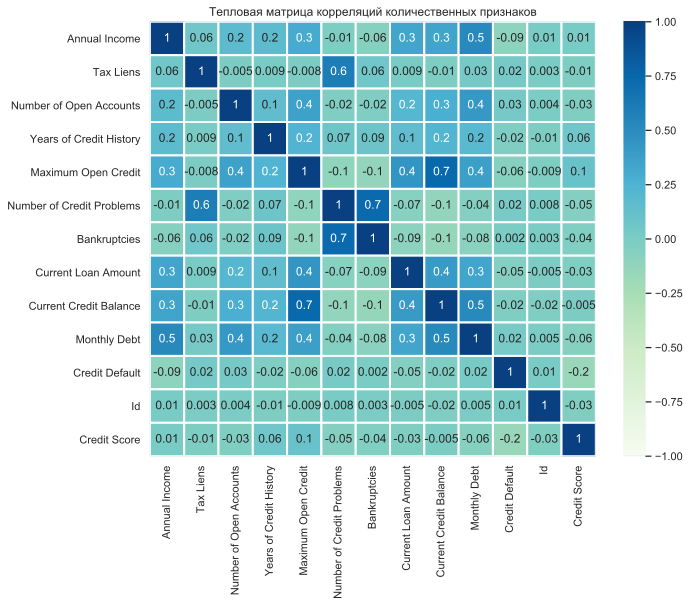

In [81]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(train_df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=2, cmap='GnBu')
plt.title('Тепловая матрица корреляций количественных признаков')
plt.show()

## Преобразование категориальных данных в бинарные

In [62]:
colls = train_df.select_dtypes('object').columns.to_list()
train_final = pd.get_dummies(train_df,columns = colls)
train_final.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087.0,0.0,11.0,26.3,685960.0,1.0,1.0,685960.0,47386.0,7914.0,...,0,0,0,0,0,0,0,0,0,1
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,0.0,264968.0,394972.0,18373.0,...,0,0,0,0,0,0,0,0,1,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,0.0,1182434.0,308389.0,13651.0,...,0,0,0,0,0,0,0,0,0,1
3,805068.0,0.0,8.0,22.5,147400.0,1.0,1.0,121396.0,95855.0,11338.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,0.0,13.0,13.6,385836.0,1.0,0.0,125840.0,93309.0,7180.0,...,0,0,0,0,0,0,0,0,0,1


## Приведение типов

In [64]:
dig_colls = ['Annual Income','Tax Liens','Number of Open Accounts','Years of Credit History',
         'Maximum Open Credit','Number of Credit Problems','Bankruptcies','Current Loan Amount',
        'Current Credit Balance','Monthly Debt','Credit Score']
for dig_col in dig_colls:
    train_final[dig_col] = train_final[dig_col].astype('int64')

"""cat_colls = train_final.select_dtypes('uint8').columns.to_list()
for cat_col in cat_colls:
    train_final[cat_col] = train_final[cat_col].astype('str')"""


"cat_colls = train_final.select_dtypes('uint8').columns.to_list()\nfor cat_col in cat_colls:\n    train_final[cat_col] = train_final[cat_col].astype('str')"

In [65]:
train_target = train_final['Credit Default']
train_final = train_final.drop('Credit Default', axis = 1)

In [66]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7497 entries, 0 to 7499
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Annual Income                   7497 non-null   int64
 1   Tax Liens                       7497 non-null   int64
 2   Number of Open Accounts         7497 non-null   int64
 3   Years of Credit History         7497 non-null   int64
 4   Maximum Open Credit             7497 non-null   int64
 5   Number of Credit Problems       7497 non-null   int64
 6   Bankruptcies                    7497 non-null   int64
 7   Current Loan Amount             7497 non-null   int64
 8   Current Credit Balance          7497 non-null   int64
 9   Monthly Debt                    7497 non-null   int64
 10  Id                              7497 non-null   int64
 11  Credit Score                    7497 non-null   int64
 12  Home Ownership_Have Mortgage    7497 non-null   uint8
 13  Hom

### Имеем подготовленный для обучения датасет train_final и его целевую перенную train_target

In [68]:
train_final.head(10)

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,482087,0,11,26,685960,1,1,685960,47386,7914,...,0,0,0,0,0,0,0,0,0,1
1,1025487,0,15,15,1181730,0,0,264968,394972,18373,...,0,0,0,0,0,0,0,0,1,0
2,751412,0,11,35,1182434,0,0,1182434,308389,13651,...,0,0,0,0,0,0,0,0,0,1
3,805068,0,8,22,147400,1,1,121396,95855,11338,...,0,0,0,0,0,0,0,0,0,1
4,776264,0,13,13,385836,1,0,125840,93309,7180,...,0,0,0,0,0,0,0,0,0,1
5,1133046,0,12,14,366784,0,0,337304,165680,18692,...,0,0,0,1,0,0,0,0,1,0
6,1511108,0,9,20,388124,0,0,388124,51623,2317,...,0,0,0,0,0,0,0,0,0,1
7,1040060,0,13,12,330374,0,0,250888,89015,19761,...,0,0,0,1,0,0,0,0,0,1
8,1349152,0,17,15,129734,1,1,129734,19,17,...,0,0,0,0,0,0,0,0,0,1
9,1165878,0,10,24,511302,0,0,572880,205333,17613,...,0,0,0,0,0,0,0,0,1,0


In [69]:
train_target.head()

0    0
1    1
2    0
3    0
4    0
Name: Credit Default, dtype: int64